## Выявление закономерностей, определяющих успешность компьютерных игр
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Данные за 2016 год могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|



## Цель исследования: 
Необходимо выявить определяющие успешность игры закономерности.

Проверить две гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

## Ход исследования

Данные для исследования мы получим одним файлом:

/datasets/games.csv.

Исследование пройдёт в четыре этапа:

1. Обзор данных.
2. Обработка данных.
3. Исследовательский анализ данных.
4. Портрет пользователя
5. Проверка гипотез.

In [1]:
#импортируем библиотеки для дальнейшего пользования 
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 7)})
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')


In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Сумма пропусков в каждом столбце
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Сумма полных дубликатов 
games.duplicated().sum()

0

Первое - привести все строки к нижнему регистру. В 'game_name есть два попуска, вместе с этим скорее всего у них отсутствует жанр и дата релиза. Так же присутствует много пропусков в столбцах с оценками и рейтингом игр. Удалять NA, наверное, не лучшая идея - теряем много данных.

In [7]:
# Приведем названия столбцов дф games к нижнему регитистру

games.columns = [c.lower() for c in list(games.columns)]

# Приведем содержимое строк к нижнему регистру
name_list = ['name', 'platform', 'genre']
for name in name_list:
    games[name] = games[name].str.lower()

In [8]:
# Удалние строк с отсутствием названия и жанра
games.dropna(subset=['name','genre'], inplace=True)

In [9]:
# Процент данных с неопределённым рейтингом от пользователей?
len(games.query('user_score == "tbd"')) / len(games)

0.14503679770238737

In [10]:
# Замена tbd на более удобный NaN
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

TBD - абревиатура, обычно обозначает не сформированный рейтинг по разным причинам, например: мало оценок от пользователей. На metacritic нужно как минимум 4 оценки от пользователей, чтобы значение tbd сменилось на рейтинг. В нашем датасете tbd составляет 15 процентов. Возможно tbd лучше скорректировать как NaN и привести данные к типу float



In [11]:
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)

Заполнять отсутвие оценок нулями кажется мне лишним. Всех подробностей отсутсвия оценки мы не знаем, поэтому просто заменил значения на -1



In [12]:
# Зполнение пропущенных значений в дате релиза
for i in games[games.year_of_release.isnull() == True].index:  
    games.year_of_release[i] = games.loc[games.name == games.name[i], 'year_of_release'].max()

games['year_of_release'] = games['year_of_release'].astype('Int64')

In [13]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,28.31


In [14]:
#заменим в столбце рейтинг на tbd
games['rating'] = games['rating'].fillna('tbd')

In [15]:
#посмотрим количество значений в каждой категории
games['rating'].value_counts()

tbd     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Существующие рейтинги:

Рейтинг в ожидании (RP)
1. Все (E)
2. Все 10+ (E10+)
3. Подросток (Т)
4. Зрелые 17+ (М)
5. Только для взрослых 18+ (АО)

Прежние рейтинги:

Раннее детство (ЕС) - Больше не используется с 2018 года.

Для детей (K-A)– для тех, кто уже научился говорить и держать геймпад в руках, эти игры уже могут вызывать интерес (позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т)


Присваеваем:

1. рейтингу EC - рейтинг E,
2. рейтингу K-A - рейтинг E10+,
3. рейтингу AO - рейтинг M,
4. рейтингу RP - рейтинг E.

In [16]:
rating_rename = {
    'EC': 'E',
    'K-A': 'E10+',  
    'AO': 'M',    
    'RP': 'E'}
games['rating'] = games['rating'].replace(rating_rename)

In [17]:
games['rating'].value_counts()

tbd     6764
E       4001
T       2961
M       1564
E10+    1423
Name: rating, dtype: int64

In [18]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 2.2+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

### Cколько игр выпускалось в разные годы?

In [19]:
# Создаем сводную таблицу с колличеством выпущенных игр по годам
game_release_count =games.pivot_table(index=['year_of_release'], values='name', aggfunc='count').sort_values('year_of_release', ascending=False)


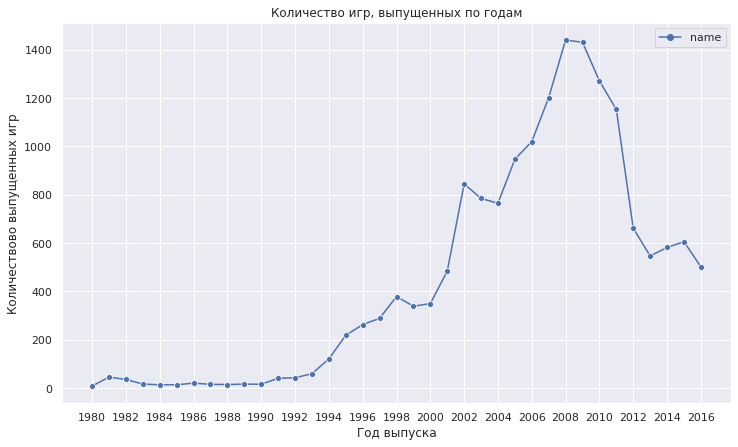

In [20]:
# Рисуем график релизов игр по годам

ax = sns.lineplot(markers=True, data=game_release_count);
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Количество игр, выпущенных по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количествово выпущенных игр')
plt.show()

### Актуальность платформ

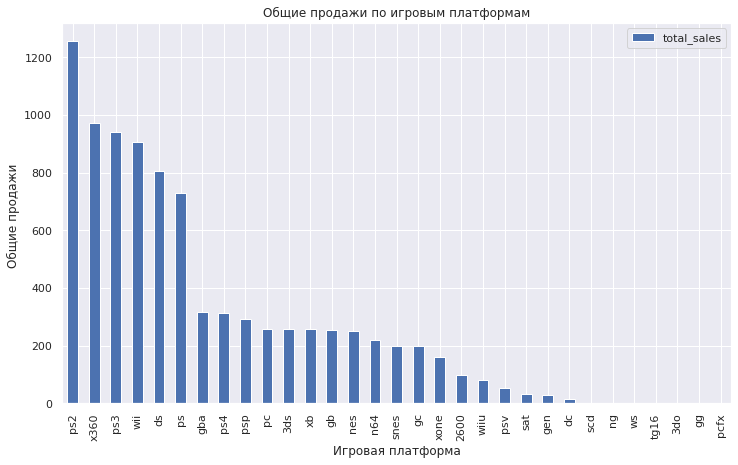

In [21]:
# График продаж игр на всех платформах
games_sales_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
ax = games_sales_platform.plot(kind='bar')
plt.title('Общие продажи по игровым платформам')
plt.xlabel('Игровая платформа')
plt.ylabel('Общие продажи ')
plt.show()

In [22]:
# Выбираем топ 5 платформ
games_top5_platform = games_sales_platform.head(5)

In [23]:
def year_total_sales(name, df):
    return (df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
)

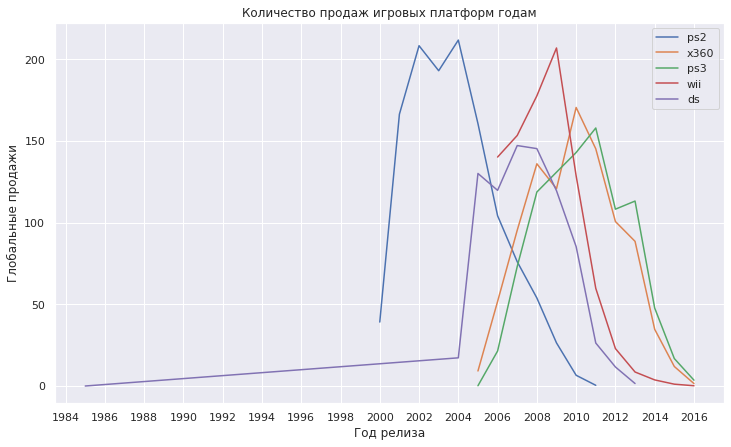

In [24]:
for platform in list(games_top5_platform.index):
    ax = year_total_sales(platform, games)['total_sales'].plot(label=platform)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.title('Количество продаж игровых платформ годам')
    plt.xlabel('Год релиза')
    plt.ylabel('Глобальные продажи')
    plt.legend()

In [25]:
ds = games[games['platform'] == 'ds']
ds['year_of_release'].value_counts()

2008    494
2009    404
2007    377
2010    324
2006    201
2011    155
2005    118
2012     24
2004     23
2013      8
1985      1
Name: year_of_release, dtype: Int64

DS вышла в 2004 году. 1985 - это точно выброс.

In [26]:
ds[ds['year_of_release']==1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,-1.0,-1.0,tbd,0.02


Игра strongest tokyo university shogi ds вышла в 2010 году

In [27]:
#заменим год выхода игры на верный
games.loc[15957, 'year_of_release'] = 2010

In [28]:
#проврка замены
ds = games[games['platform'] == 'ds']
ds['year_of_release'].value_counts()

2008    494
2009    404
2007    377
2010    325
2006    201
2011    155
2005    118
2012     24
2004     23
2013      8
Name: year_of_release, dtype: Int64

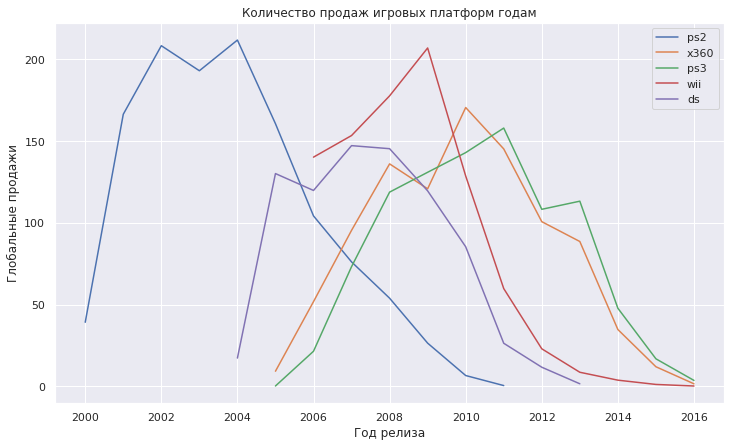

In [29]:
for platform in list(games_top5_platform.index):
    ax = year_total_sales(platform, games)['total_sales'].plot(label=platform)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.title('Количество продаж игровых платформ годам')
    plt.xlabel('Год релиза')
    plt.ylabel('Глобальные продажи')
    plt.legend()

Срок существования игровых платформ составляет порядка 10 лет.

Пики популярности каждой платформы различны по годам и зависят от рекламной компанией при выходе новой платформы, количеством предлагаемых игр на платформе и предлагаемых эксклюзивов.

Среднесрочное планирование — 3-5 лет. В крупных компаниях определяет соотношение необходимых ресурсов для выпуска нужного объёма продукции.

С учетом выше указанного в дальнейшем оперируем актуальным периодом 2014-2016 гг. (3 года)

### Популярные платформы

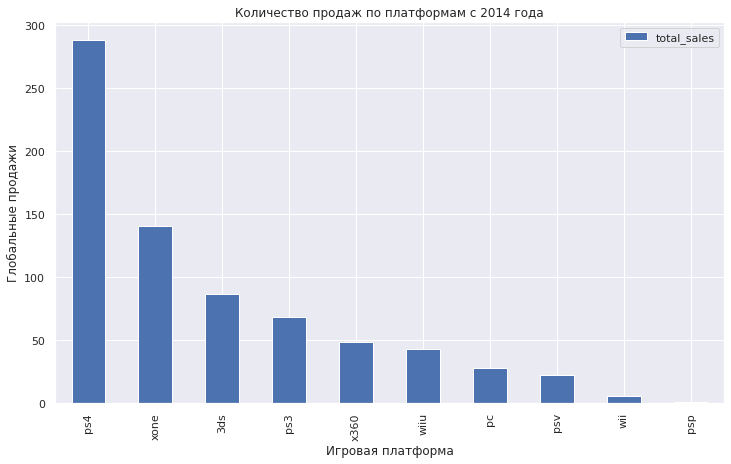

In [30]:
# График популярности платформ 
games_actualy = games.query('year_of_release >= 2014').reset_index(drop=True)
total_sales = games_actualy.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
total_sales.plot(kind='bar')
plt.title('Количество продаж по платформам с 2014 года')
plt.xlabel('Игровая платформа')
plt.ylabel('Глобальные продажи')
plt.show()

 Опираясь на графики я бы выделил консоли нового поколения Ps4 и XboxOne как самые перспективные для поддержки новых игр и игрового опыта. Обе консили вышли в 2013-2014 году (зависит от региона) и на момент 2016 года были наиболее актуальными (я сам пользовался пс4 аж до 2022 года). Еще одной актулаьной платформой является  PC, падение продаж игр могу описать только высоким уровнем пиратского контента и быстрой сменой комплектующих на рынке (не увсех есть возможность раз в год тратить кучу денег на новую видеокарту) 

### Платформы нового поколения. Усы

In [31]:
#отсортируем с 2014 по 2016
df = games.query('year_of_release >= 2014')

In [32]:
print(df['platform'].value_counts().head())

top_platform = (df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
    .head()
)
top_platform

ps4     376
psv     295
xone    228
ps3     219
3ds     212
Name: platform, dtype: int64


,platform,total_sales
0,ps4,288.15
1,xone,140.36
2,3ds,86.68
3,ps3,68.18
4,x360,48.22


In [33]:
#выделяем топ 5 платформ
df_top = df.query('platform in @top_platform.platform')
df_top['platform'].unique()

array(['ps4', '3ds', 'xone', 'ps3', 'x360'], dtype=object)

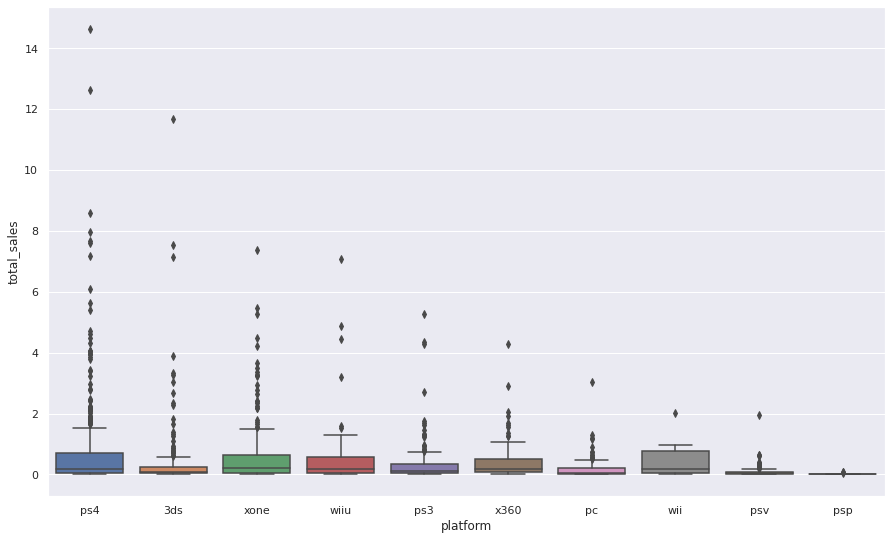

In [34]:
plt.figure(figsize=(15,9))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.show()

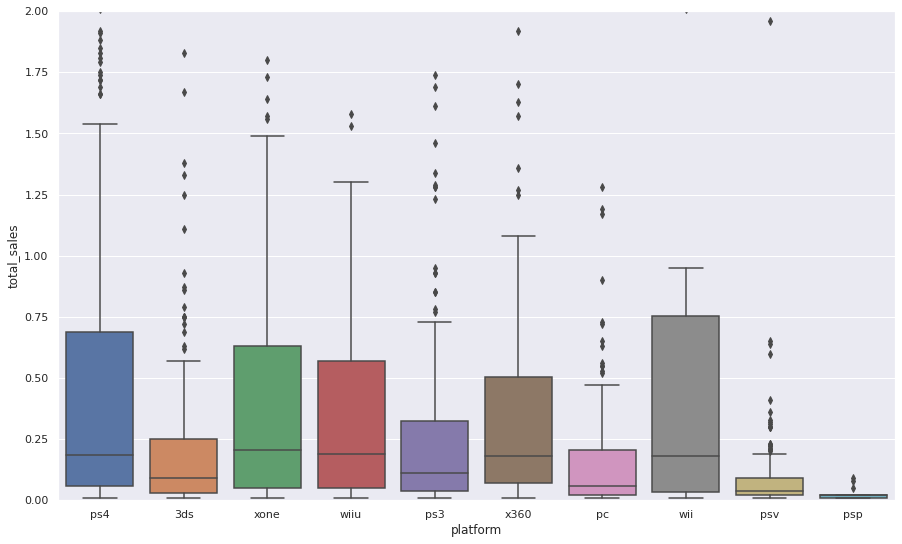

In [35]:
plt.figure(figsize=(15,9))

sns.boxplot(x='platform', y='total_sales', data=df)
plt.ylim(0, 2)
plt.show()

Перевес продаж игр на PS4 в два раза больше чем у XboxOne. Такой перевес вызван больним количеством эксклюзивных игр на PS4

### Rак влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [36]:
df_top_user = df_top.query('user_score != -1')
df_top_critic = df_top.query('critic_score != -1')

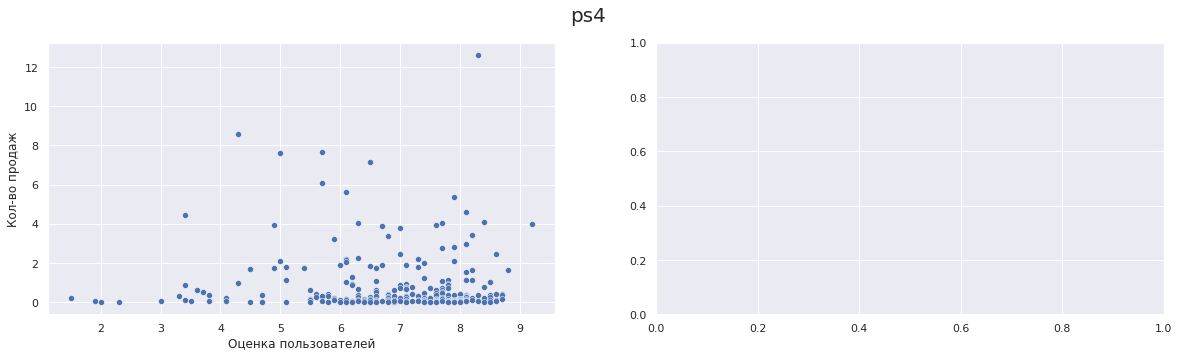

Корреляция между оценкой пользователей и продажами -0.040131589472697356


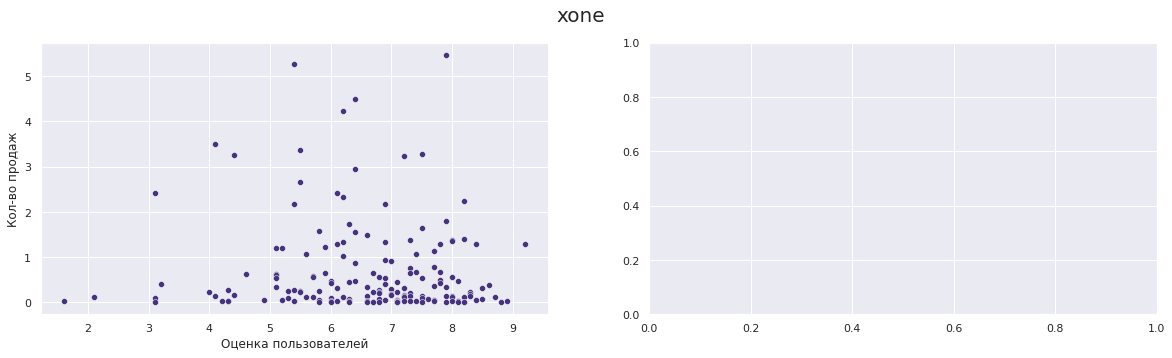

Корреляция между оценкой пользователей и продажами -0.0703839280647581


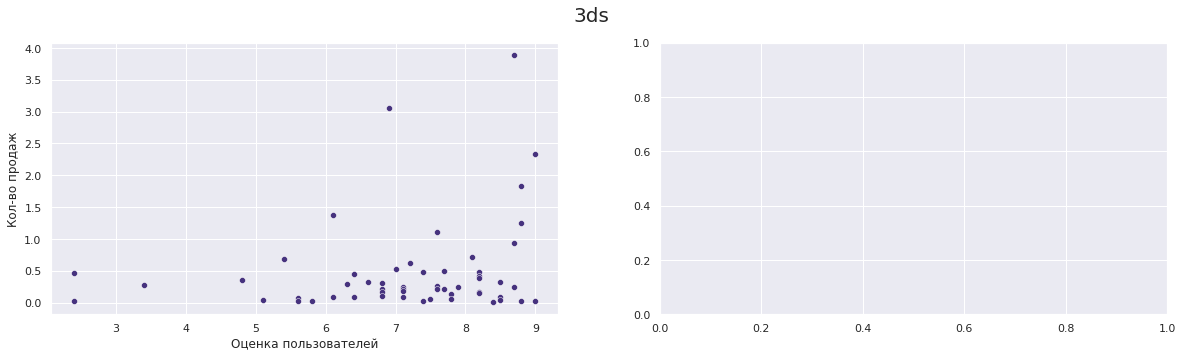

Корреляция между оценкой пользователей и продажами 0.2151932718527028


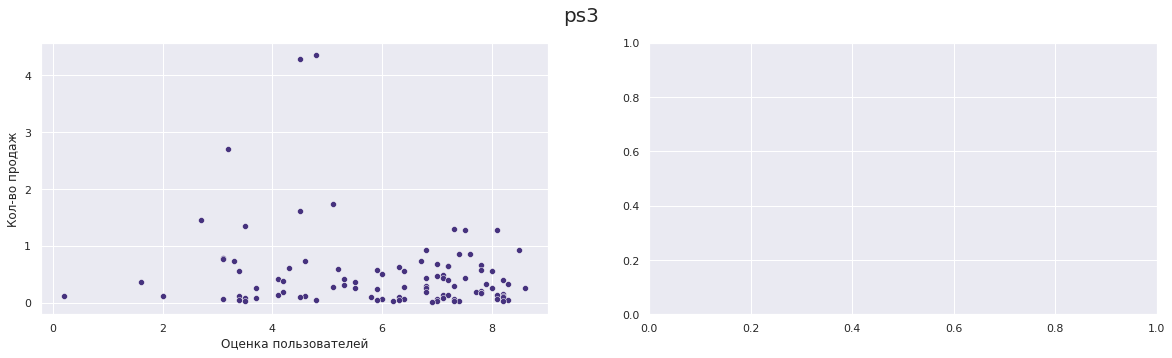

Корреляция между оценкой пользователей и продажами -0.16676141347662118


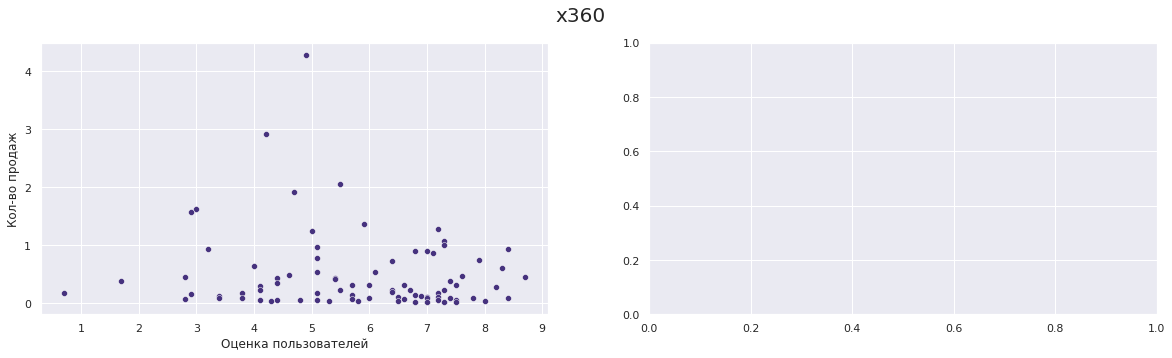

Корреляция между оценкой пользователей и продажами -0.138444570945665


In [37]:
def user_range(name_platform):
    platform = df_top_user[df_top_user['platform']==name_platform]
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    sns.set_palette('viridis')
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=axes[0])
    fig.suptitle(name_platform, fontsize=20)
    axes[0].set(xlabel='Оценка пользователей')
    axes[0].set(ylabel='Кол-во продаж')
    plt.show()
    
    user_corr = platform['user_score'].corr(platform['total_sales'])
    print('Корреляция между оценкой пользователей и продажами', user_corr)
    
list_platforms = ['ps4', 'xone', '3ds', 'ps3', 'x360']
for platform in list_platforms:
    user_range(platform)

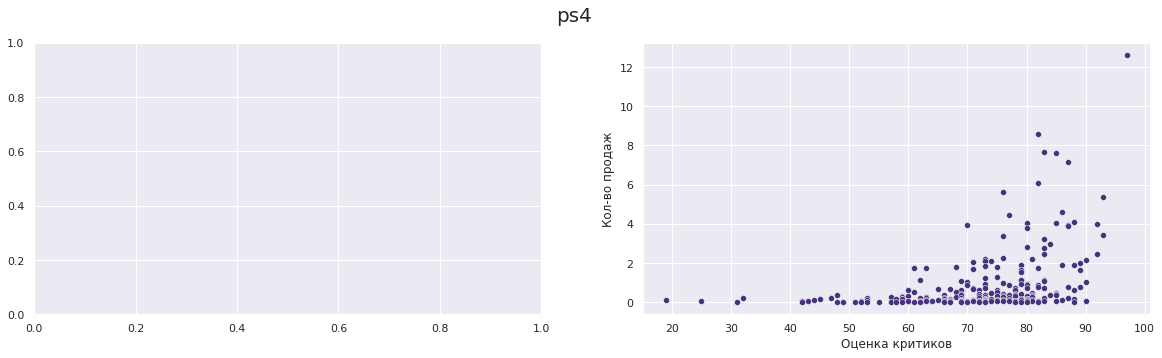

Корреляция между оценкой критиков и продажами 0.40266141068104083


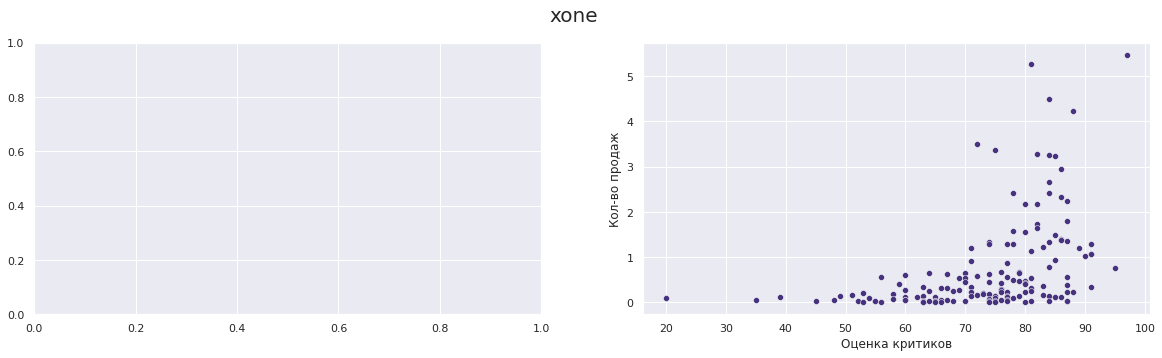

Корреляция между оценкой критиков и продажами 0.42867694370333226


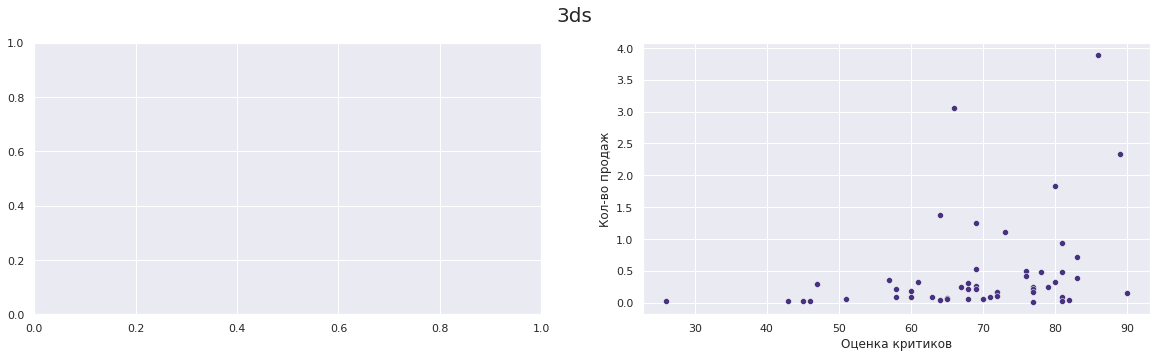

Корреляция между оценкой критиков и продажами 0.314117492869051


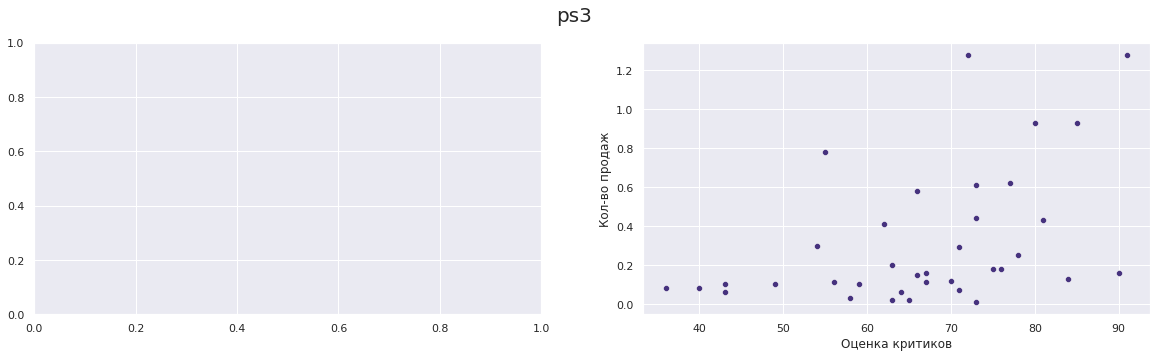

Корреляция между оценкой критиков и продажами 0.44657460493190704


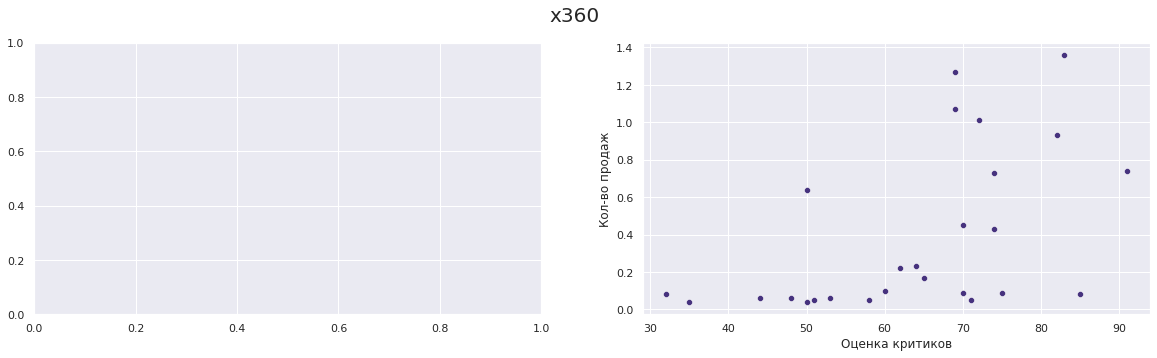

Корреляция между оценкой критиков и продажами 0.5257228356581523


In [38]:
def critic_range(name_platform):
    platform = df_top_critic[df_top_critic['platform']==name_platform]
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    sns.set_palette('viridis')
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=axes[1])
    fig.suptitle(name_platform, fontsize=20)
    axes[1].set(xlabel='Оценка критиков')
    axes[1].set(ylabel='Кол-во продаж')
    plt.show()
    
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    print('Корреляция между оценкой критиков и продажами', critic_corr)
    
list_platforms = ['ps4', 'xone', '3ds', 'ps3', 'x360']
for platform in list_platforms:
    critic_range(platform)

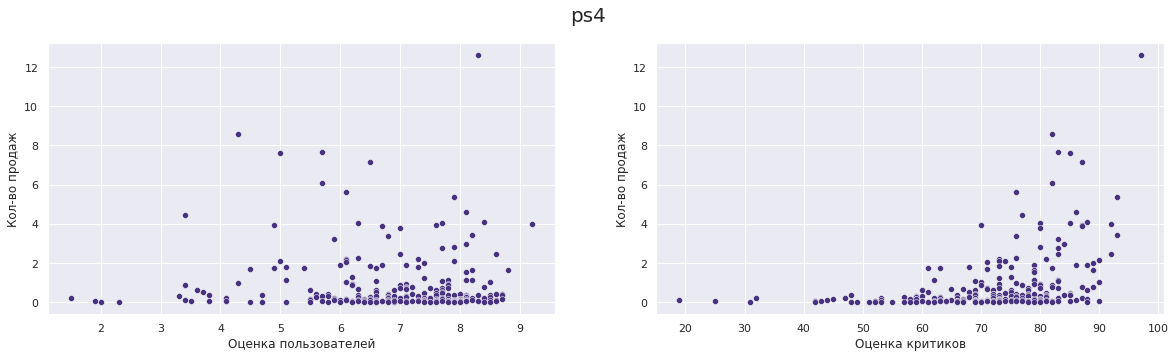

Корреляция между оценкой пользователей и продажами -0.04318585997193634
Корреляция между оценкой критиков и продажами 0.40190287811475334


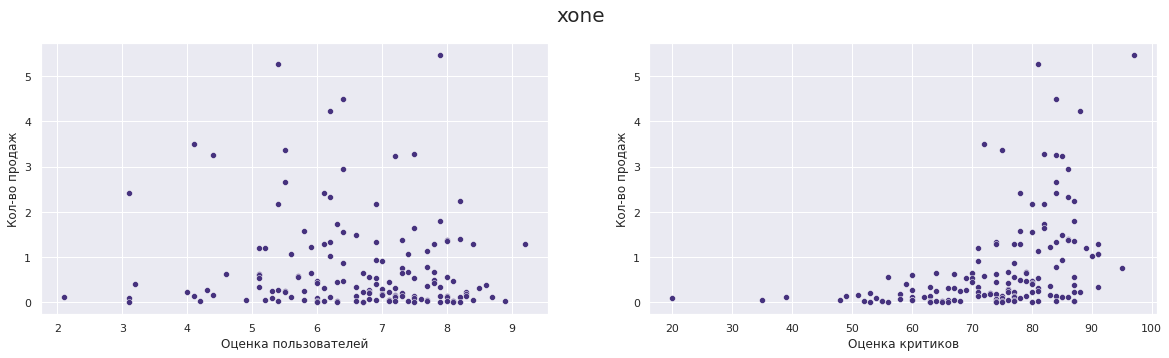

Корреляция между оценкой пользователей и продажами -0.0917343450331075
Корреляция между оценкой критиков и продажами 0.42211185105557647


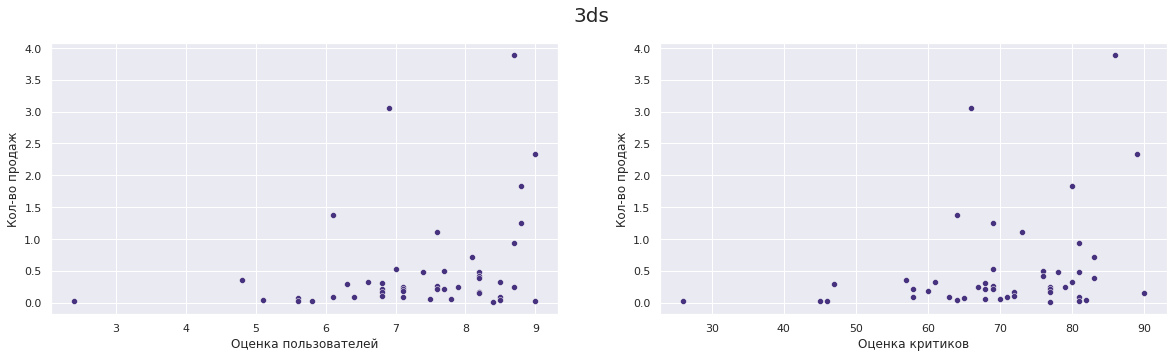

Корреляция между оценкой пользователей и продажами 0.2798498792503281
Корреляция между оценкой критиков и продажами 0.28468579095782925


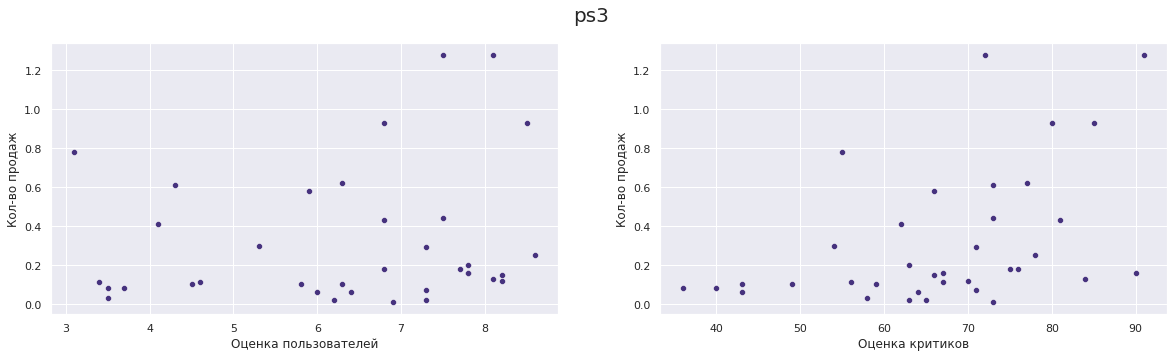

Корреляция между оценкой пользователей и продажами 0.15659516181359956
Корреляция между оценкой критиков и продажами 0.44657460493190704


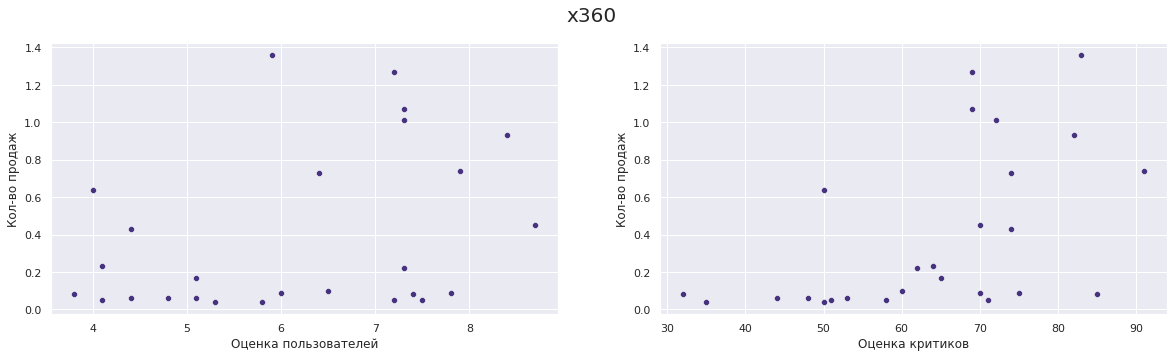

Корреляция между оценкой пользователей и продажами 0.33651362483599345
Корреляция между оценкой критиков и продажами 0.5257228356581523


In [56]:
# Комментарий ревьюера 3
def код_ревьюера(name_platform):
    platform1 = df_top_user[df_top_user['platform']==name_platform]
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    
    sns.set_palette('viridis')
    sns.scatterplot(x='user_score', y='total_sales', data=platform1, ax=axes[0])
    fig.suptitle(name_platform, fontsize=20)
    axes[0].set(xlabel='Оценка пользователей')
    axes[0].set(ylabel='Кол-во продаж')
    
    platform2 = df_top_critic[df_top_critic['platform']==name_platform]
    sns.scatterplot(x='critic_score', y='total_sales', data=platform2, ax=axes[1])
    fig.suptitle(name_platform, fontsize=20)
    axes[1].set(xlabel='Оценка критиков')
    axes[1].set(ylabel='Кол-во продаж')
    plt.show()
    
    user_corr = platform1['user_score'].corr(platform1['total_sales'])
    print('Корреляция между оценкой пользователей и продажами', user_corr)
    critic_corr = platform2['critic_score'].corr(platform2['total_sales'])
    print('Корреляция между оценкой критиков и продажами', critic_corr)

    
list_platforms = ['ps4', 'xone', '3ds', 'ps3', 'x360']
for platform in list_platforms:
    код_ревьюера(platform)

Связи между оценками пользователей и глобальными продажами игр - нет. Оценки критиков могут повлятьт на продажи но незначительно. Вероятнее всего большинству геймеров просто нравится играть и они не сильно замарачиваются по поводу отзывов. Но и сказать что геймеры доверяют друг другу больше чем критикам тоже нельзя. 


### Распределение игр по жанрам

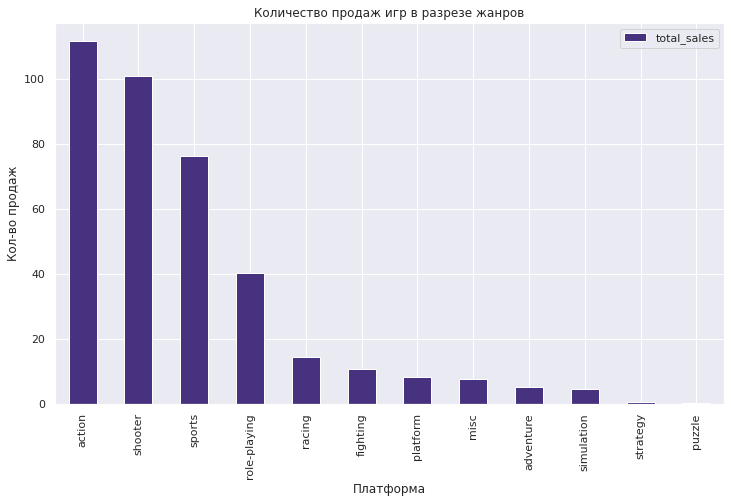

In [39]:
df_top = df_top.query('user_score != -1 and critic_score != -1')
df_top.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar', y='total_sales')
plt.title('Количество продаж игр в разрезе жанров')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')
plt.show()

По продажам лидирует жанр экшн, следом за ним шотеры и спорт 

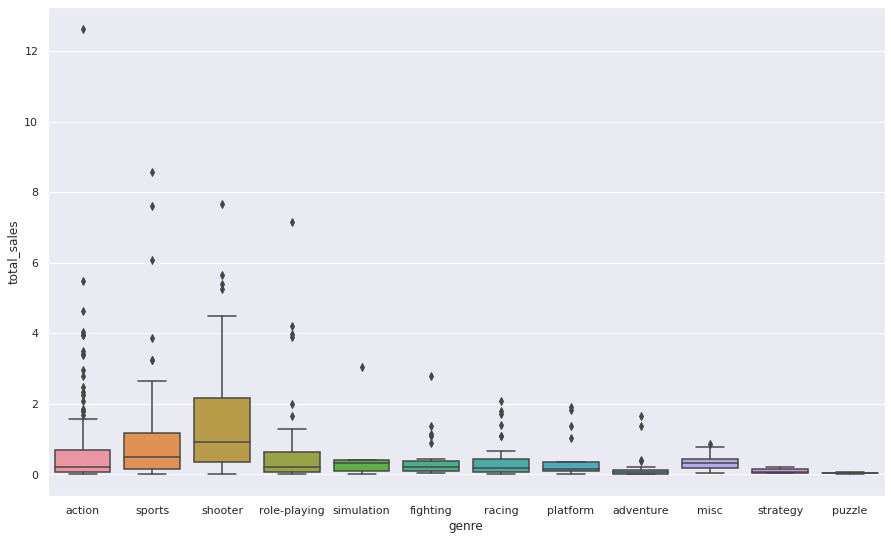

In [40]:
plt.figure(figsize=(15,9))
sns.boxplot(x='genre', y='total_sales', data=df_top)
plt.show()

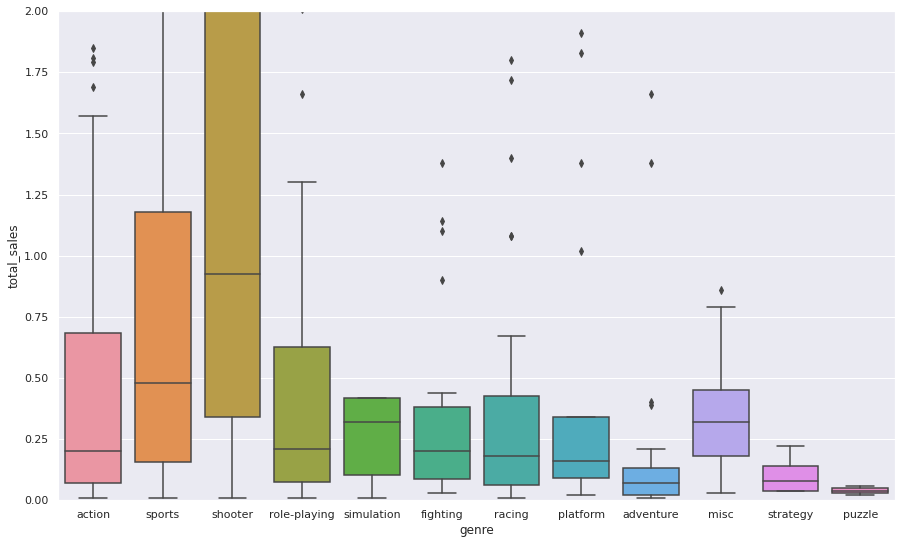

In [41]:
plt.figure(figsize=(15,9))

sns.boxplot(x='genre', y='total_sales', data=df_top)
plt.ylim(0, 2)
plt.show()

Проанализировав продажи по меданным значеиням выхобит что жарн экшн занимает 4 строчку с списке продаж. 

Лидирующие жанры по медианным значениям являются:

1. shooter
2. sports
3. role-playing (такой рост можно описать сильным преобладаение данного жанра на японском рынке)

Ролевые игры не так любят в америке и европе, там отдают предпочтение экшену и шутерам, но медиана продаж говорит об их успешности на японском рынке  
 

###  Самые популярные платформы (топ-5) (NA, EU, JP)

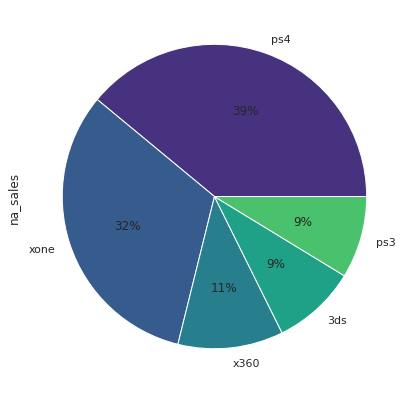

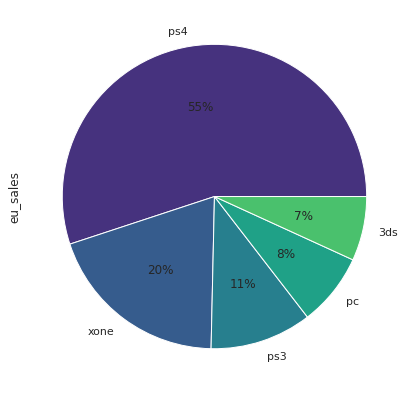

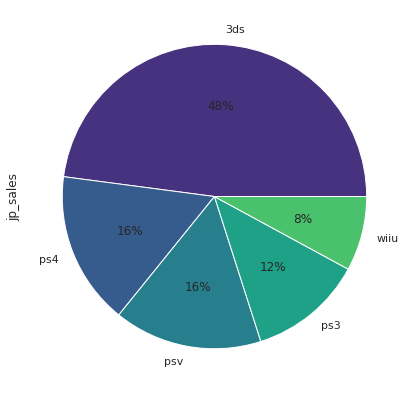

In [42]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_list:
    (games_actualy
     .pivot_table(index='platform', values=region, aggfunc='sum')
     .sort_values(region, ascending=False).head(5)
     .plot(kind='pie', y=region, autopct='%1.0f%%', legend=False)
)

В северной америке (NA) - Xbox 360 от Microsoft лидирует по продажам,. На втором месте консоли от Nintendo, которые обгоняют Playstation 3 - её доля составляет 20% рынка. Наименьшую долю рынка занимает Playstation 2 от Sony, справедливо, ведь на смену ей пришла ps3, а затем ps4

В европе(EU) - немнго лидирует  Playstation 3 от Sony, Xbox 360 находится на второй позиции. Последнюю позицию занимает Playstation 4, данная консоль вышла недавно и не все пользователи обновили свои приставки. Ситуация у XboxONE более плачевная, ее приняли не так тепло что даже на графикене видно.

В японии (JP) - геймеры отдают свое предпочтение портативным платформам. На этом рынке лидирует Nintendo, целых три консоли от них занимают рынок. 2 из 5 позиции занимают Sony с портативной PSP и стационарной Playstation 3.

### Самые популярные жанры (топ-5) NA, EU, JP

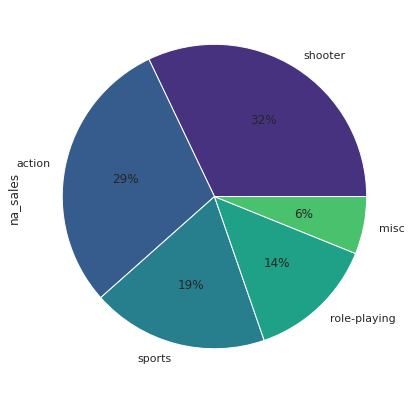

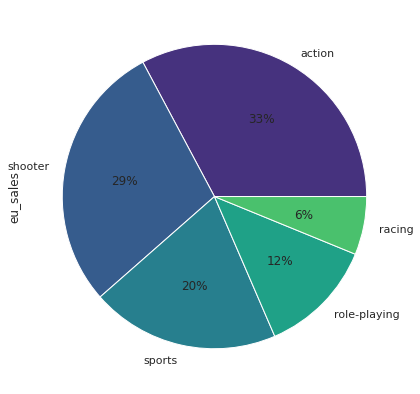

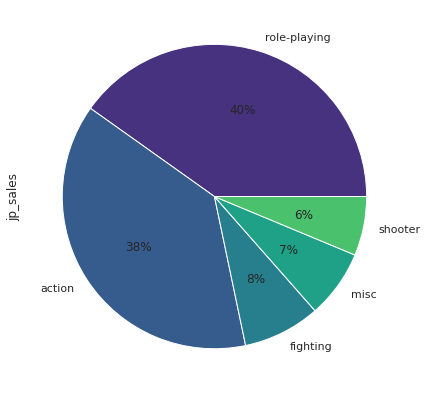

In [43]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_list:
    (games_actualy
     .pivot_table(index='genre', values=region, aggfunc='sum')
     .sort_values(region, ascending=False).head(5)
     .plot(kind='pie', y=region, autopct='%1.0f%%', legend=False)
)

В северной америке и европе отдают предпочтение играм жанра - экшн, спорт и шутеры.

В японии немного другая картина, тут геймеры предпочитают Role Play и только следом идет экшн


### Влияет ли рейтинг ESRB на продажи в отдельном регионе

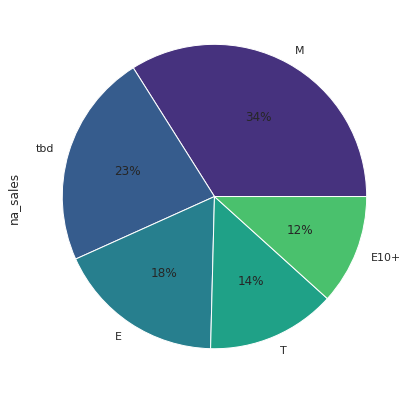

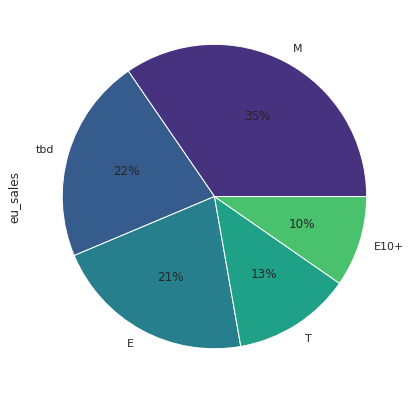

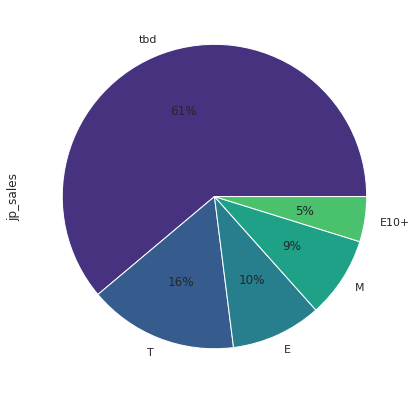

In [44]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_list:
    (games_actualy
     .pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(region, ascending=False).head(5)
     .plot(kind='pie', y=region, autopct='%1.0f%%', legend=False)
)

In [45]:
# Комментарий ревьюера
temp = games_actualy.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


tbd     749
T       271
M       266
E       219
E10+    185
Name: rating, dtype: int64

Во всех регионах издатели стараются удержать аудиторию не достигших возраста 18+. В топ 5 не входит рейтинг Adult Only(Ao) 

### Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H₀) - будет означать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза (H₁) - будет означать, что средние пользовательские рейтинги платформ Xbox One и PC различаются

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [46]:
xone = games_actualy.query('(platform == "xone") & (user_score != -1)')['user_score']
pc = games_actualy.query('(platform == "pc") & (user_score != -1)')['user_score']

results = st.ttest_ind(xone, pc, equal_var=False) 

alpha = 0.05

print('Средний пользовательский рейтинг платформы Xbox One:', xone.mean())
print('Средний пользовательский рейтинг платформы PC:', pc.mean())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги платформ Xbox One и PC различаются (H₁)")
else:
    print("Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (H₀)")


Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC: 6.316260162601626
p-значение: 0.139237120435483
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (H₀)


In [47]:
# Комментарий ревьюера
pc.min(), xone.min()

(1.4, 1.6)

Гипотеза "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не подтвердилась

### Проверка гипотез

Распределение данных в action и sports

Нулевая гипотеза (H₀) - будет означать, что рейтинги равны

Альтернативная гипотеза (H₁) - будет означать, что рейтинги не равны

In [48]:
action = games_actualy.query('(genre == "action") & (user_score != -1)')['user_score']
sports = games_actualy.query('(genre == "sports") & (user_score != -1)')['user_score']

results = st.ttest_ind(action, sports, equal_var=False) 

alpha = 0.05

print('Средний пользовательский рейтинг жанра Action:', action.mean())
print('Средний пользовательский рейтинг жанра Sports:', sports.mean())

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print('Рейтинги жанров равны (H₀)')
else:
    print('Рейтинги жанров не равны (H₁)')

Средний пользовательский рейтинг жанра Action: 6.766442953020134
Средний пользовательский рейтинг жанра Sports: 5.2251968503937
p-значение: 9.658176026869598e-15
Рейтинги жанров не равны (H₁)


Гипотеза "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные." подтвердилась. 



### Вывод

Можно выделить такие аспекты ситуации на рынке:

Временной отрезок актуальности платформ равен 2-5 лет, в среднем платформа не теряет актуальности в ттечении 10 лет;

На данный момент актуальными платформами являются консоли нового поколения Playstation 4 и Xbox One;

Япония – рынок отличается от остальных регионов. Спросом пользуются портативные консоли и жанр RPG;

В Европе и Америке лидируют такие жанры как: экшн, спорт и шутеры;

В Японии лидируют жарны ролевых игр и экшен, занимая большую часть рынка;

Значительную долю рынка занимают игры с рейтингом ниже Adult Only(Ao) и нацелены на детей и подростков.

Так же мы отклонили гипотезу о равенстве средней оценки пользователя между платформами Xbox One и PC и подтвердили гипотезу о различии средней оценки пользователя между жанрами Action и Sports.